In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import xlrd
xlsfile = pd.ExcelFile('SPEED.xls')

DF = xlsfile.parse('Sheet1')

In [3]:
#support vector machine import
from sklearn.svm import SVC

In [4]:
input_vars = ['gender', 'samerace', 'attr', 'sinc', 'intel', 'fun', 'amb',
              'shar', 'like', 'dec', ]

In [5]:
df = DF.loc[:, input_vars]

In [6]:
df.isnull().sum()
df.dropna(inplace=True)

In [7]:
df.describe()

,gender,samerace,attr,sinc,intel,fun,amb,shar,like,dec
count,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000
mean,0.510047,0.392903,6.194442,7.165313,7.357845,6.396751,6.759655,5.461522,6.130925,0.431238
std,0.499935,0.488430,1.950067,1.741989,1.560403,1.957664,1.797467,2.148612,1.851373,0.495285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,0.000000
50%,1.000000,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,0.000000
75%,1.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,1.000000
max,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [8]:
model = SVC()

In [9]:
features = df.drop(['dec'], axis=1)
target = df[['dec']]

In [10]:
from sklearn.cross_validation import train_test_split
#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, target)

C:\Users\Selin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
#Fit the model
model.fit(X_train, Y_train)

C:\Users\Selin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
from sklearn import metrics

#Get predictions
predicted = model.predict(X_test)
expected = Y_test

#Compare results
print (metrics.accuracy_score(expected,predicted))

0.762393162393


In [13]:
#import all SVM
from sklearn import svm

features = df.drop(['dec'], axis=1)
target = [['dec']]

#SVM regularization parameter
C = 1

#SVC with a Linear Kernel
svm = svm.SVC(kernel = 'linear', C=C).fit(target, features)

#Gaussian Radial Bassis Function
rbf_svc = svm.SVC(kernel = 'rbf', gamma = 0.7, C=C).fit(target, features)

#SVC with 3rd degree polynomial
poly_svc = svm.SVC(kernel = 'poly', degree=3, C=C).fit(target, features)

#SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(target, features)

ValueError: could not convert string to float: 'dec'

<Figure size 720x720 with 0 Axes>

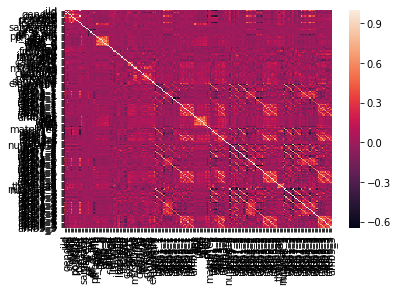

<Figure size 720x720 with 0 Axes>

In [24]:
import seaborn as sns
corr = DF.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


<Figure size 720x720 with 0 Axes>

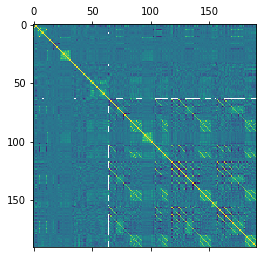

<Figure size 720x720 with 0 Axes>

In [20]:
plt.matshow(DF.corr())
#corr.plot(figsize=(20,10))
plt.figure(figsize=(10,10))